# Figure 3a. Colocalization patterns across three different molecular trait modalities (expression, splicing, protein abundance).

*ColocBoost* was applied to 17 gene-level cis-xQTL datasets from the aging brain cortex of ROSMAP subjects (average N=595) spanning 16,928 genes. UpSet plot summarizing the colocalization patterns across three different molecular trait modalities (expression, splicing, protein abundance). See Table 2 for details of each modality. 

In [8]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
res <- readRDS("data/xQTL_only_colocalization.rds")

## Organize colocalization

In [2]:
all_pheno <- c("Mic","Ast","Oli","OPC","Exc","Inh","DLPFC","AC","PCC","Monocyte","pQTL",
               "AC_productive","AC_unproductive","DLPFC_productive","DLPFC_unproductive","PCC_productive","PCC_unproductive")
coloc_pheno <- lapply(res$colocalized_phenotypes, function(cp){ strsplit(cp, "; ")[[1]] })
coloc <- lapply(all_pheno, function(y) {
  pos <- sapply(coloc_pheno, function(cp) y %in% cp ) 
  which(pos)
})
names(coloc) <- all_pheno
coloc_eQTL <- unique(unlist(coloc[1:10]))
coloc_pQTL <- coloc[[11]]
coloc_sQTL <- unique(unlist(coloc[12:17]))
coloc_xQTL <- list("eQTL" = coloc_eQTL,
                   "pQTL" = coloc_pQTL,
                   "sQTL" = coloc_sQTL)
names(coloc_xQTL) <- c("   eQTL\n (10 contexts)", "  pQTL\n (1 context)", "   sQTL\n (6 contexts)")

## UpSet plot

In [3]:
library("UpSetR")
library("ggplot2")
max_size <- max(sapply(coloc_xQTL, length))
p1 <- upset(fromList(coloc_xQTL),
            order.by = "freq",
            keep.order = T,
            main.bar.color = "steelblue3",
            sets.bar.color = "sandybrown",
            text.scale = c(2,2,3,2,2,2.3), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 0, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 6, line.size = 1.5,
            sets = c("  pQTL\n (1 context)", "   sQTL\n (6 contexts)", "   eQTL\n (10 contexts)"),
            nsets = length(coloc_xQTL),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.55*max_size,
            nintersects = 25,
            mainbar.y.label = "Number of 95% CoS for\n each configuration",
            sets.x.label = NULL)

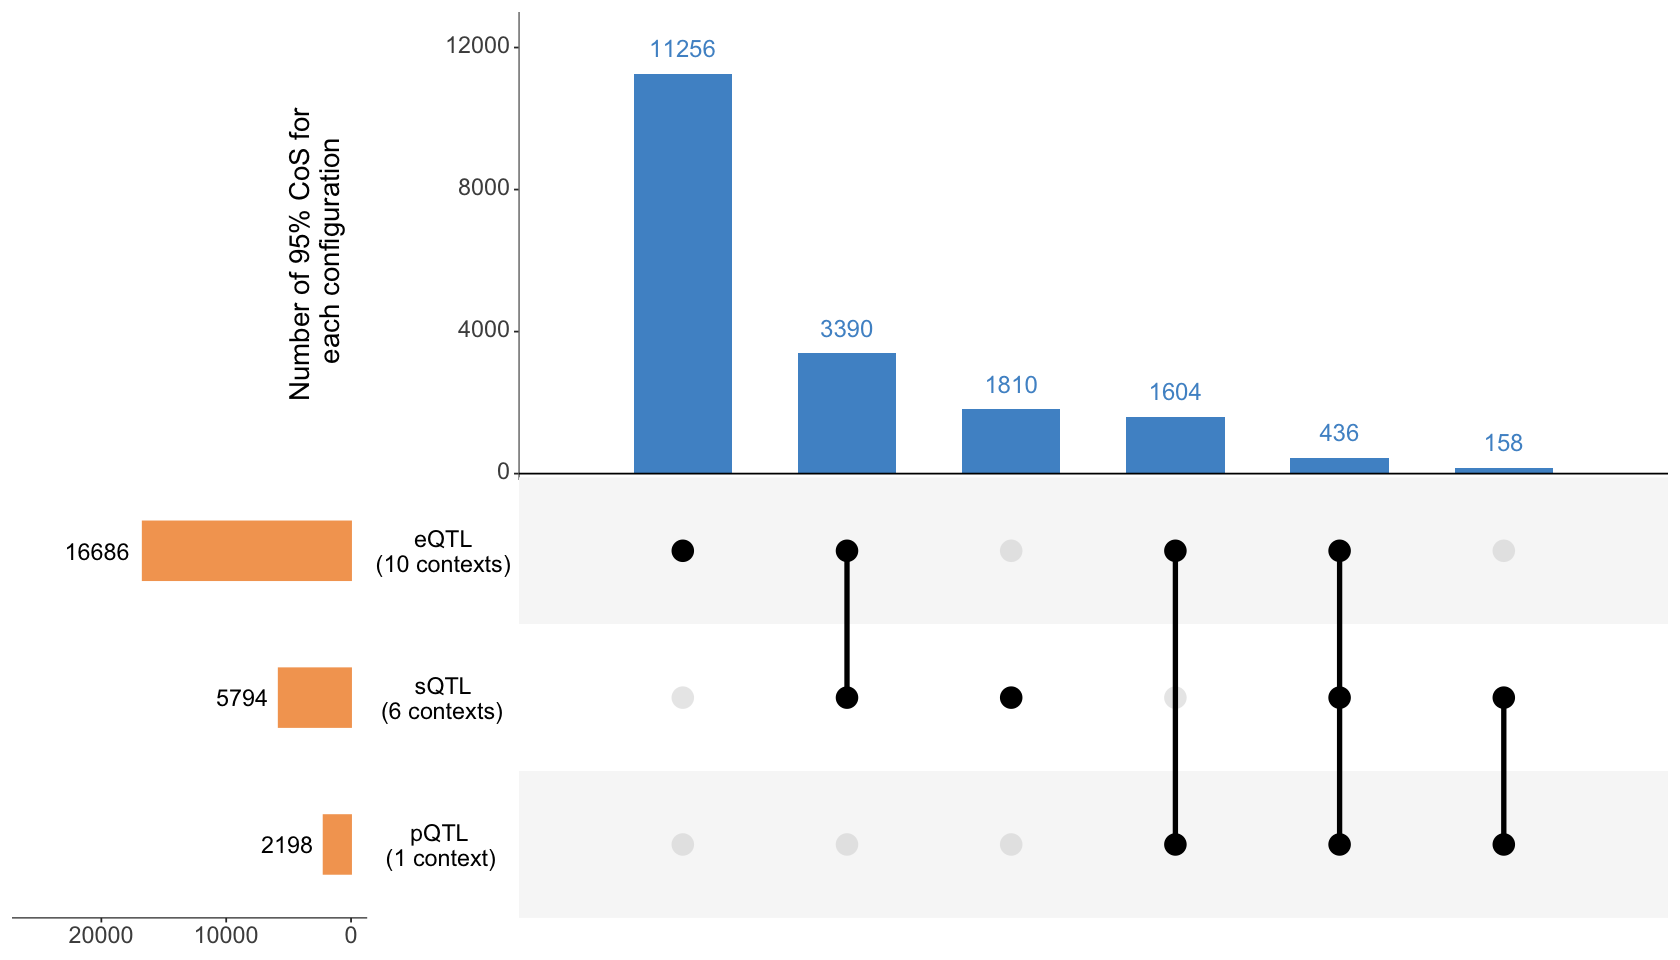

In [6]:
options(repr.plot.width = 14, repr.plot.height = 8)
p1